In [21]:
#Import modules 
import time as T
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import torch
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

#Go to the parent folder AI II FINAL CODE as main path 
try: 
    import os
    if str(os.getcwd())[-16:] != "AI II FINAL CODE": 
        os.chdir('../../AI II FINAL CODE/')
except:
    pass 

In [22]:
#Get current path 
#os.getcwd()

Gradient function erfPlus() is correct
Gradient function erfRelu() is correct
Gradient function squarePlus() is correct
Gradient function degreePlus() is correct


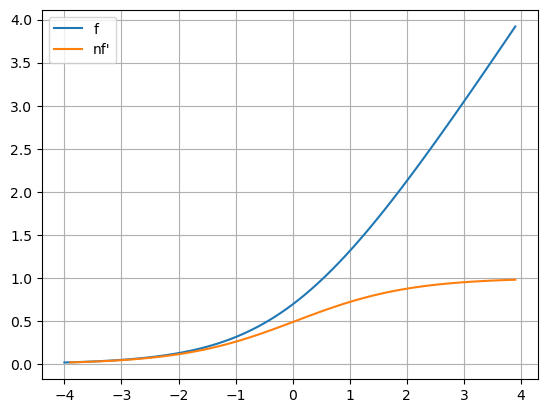

Using device: cuda


In [23]:
#Import local modules 
%run CurrentCode/Model2.ipynb
%run CurrentCode/actFunctions2.ipynb
%run CurrentCode/DeviceDataLoader2.ipynb

In [24]:
trialsPerExperiment = 30

LR = [0.2, 0.1, 0.05, 0.01, 0.005]

actFuncList = [nn.ReLU, nn.GELU, squarePlus,  nn.Softplus, erfRelu, erfPlus] 
actFuncList_str = ['relu', 'gelu', 'squarplus', 'softplus','erfrelu', 'erfplus'] 
histories = [] 


In [ ]:
totTime0 = T.time() 
#For each trial, find a random seed and do the following 
for ii in range(trialsPerExperiment): 
    SEED = np.random.randint(1,99999)
    batches = []
    #make sure the seed is the same for each model 
    for actFunc_num in range(len(actFuncList)):
        #Set seed for the model 
        set_seed(SEED)
        history = []
        t0 = T.time()
        #Make the model with 50 blocks of the residual block and put it in gpu or cpu of choice 
        model = ResNet(block=ResidualBlock, img_input_dim=28, layers=50, actFunc=actFuncList[actFunc_num])
        to_device(model, device)
        
        #Fit the model 
        for jj in range(len(LR)):
            history += model.fit(epochs=5, lr=LR[jj], mo=0.1, train_loader=train_loader, val_loader=val_loader, print_statement=False)
        
        #Find final score of the model 
        score = -np.log(1-history[-1]['val_acc'])
        
        actFuncName = actFuncList_str[actFunc_num]
        
        #Print the results 
        print(f'Trial: {ii+1} Time (s): {T.time()-t0:.3f} Score: {score:.3f} AF: {actFuncName}')
        
        #Save the model 
        modelPath = "Models/Experiment1/" + f"M1_{actFuncName}_{ii}_{SEED}"
        
        torch.save(model.state_dict(), modelPath)
        
        #Add the history of each activation function model to a batch 
        batches.append(history)
    
    #Add the batch to the trials 
    histories.append(batches)
    
totTime1 = T.time()

Trial: 1 Time (s): 113.360 Score: 2.048 AF: relu
Trial: 1 Time (s): 118.490 Score: 1.652 AF: gelu
Trial: 1 Time (s): 144.468 Score: 1.660 AF: squarplus
Trial: 1 Time (s): 114.119 Score: 1.663 AF: softplus
Trial: 1 Time (s): 154.627 Score: 2.093 AF: erfrelu
Trial: 1 Time (s): 174.562 Score: 2.116 AF: erfplus
Trial: 2 Time (s): 121.446 Score: 1.591 AF: relu
Trial: 2 Time (s): 120.523 Score: 1.779 AF: gelu
Trial: 2 Time (s): 148.728 Score: 1.002 AF: squarplus
Trial: 2 Time (s): 122.426 Score: 1.344 AF: softplus
Trial: 2 Time (s): 151.231 Score: 2.116 AF: erfrelu
Trial: 2 Time (s): 181.908 Score: 2.104 AF: erfplus
Trial: 3 Time (s): 118.810 Score: 2.056 AF: relu
Trial: 3 Time (s): 118.643 Score: 1.976 AF: gelu
Trial: 3 Time (s): 147.871 Score: 1.430 AF: squarplus
Trial: 3 Time (s): 120.942 Score: 2.078 AF: softplus
Trial: 3 Time (s): 151.859 Score: 1.676 AF: erfrelu
Trial: 3 Time (s): 176.425 Score: 2.074 AF: erfplus
Trial: 4 Time (s): 116.435 Score: 2.051 AF: relu
Trial: 4 Time (s): 120.4

In [26]:
print(f"Experiment run time: {((totTime1-totTime0)/60):.3f} mins") 

Experiment run time: 411.814 mins


In [ ]:
#If NEWdata is true, then store the variable as a pickle object otherwise get the previous pickled result and add the current result together as the new pickle object 
NEWdata = False 

if NEWdata: 
    uploadObject(histories, 'Results/Experiment1_pkl', nosilence=True)
else:
    try: 
        hist_data = loadObject('Results/Experiment1_pkl')
        print(len(hist_data))
        uploadObject(histories + hist_data, 'Results/Experiment1_pkl', nosilence=True)
    except:
        uploadObject(histories, 'Results/Experiment1_pkl', nosilence=True)
    

Time: 0.00812 s

20
Time: 0.00700 s

----------------FINISHED SAVING----------------
Time: -1743148290.97281 s

